In [169]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda skill_listing: ast.literal_eval(skill_listing) if pd.notna(skill_listing) else skill_listing)

In [170]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [171]:
df_DA["month"] = df_DA["job_posted_date"].dt.month
df_DA = df_DA.explode("job_skills")
df_DA_skills_pivot = df_DA.pivot_table(index="month",columns="job_skills", aggfunc="size", fill_value=0)

In [172]:
df_DA_skills_pivot.loc["total"] = df_DA_skills_pivot.sum()
df_DA_skills_pivot =df_DA_skills_pivot[df_DA_skills_pivot.loc["total"].sort_values(ascending=False).head(10).index]

In [173]:
df_DA_skills_pivot


job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap
month,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947
5,6617,4773,4070,3245,2695,2093,1940,979,957,851
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117
9,6829,4886,4229,3446,3118,2146,1880,944,945,852


In [174]:
# df_us_pivot["month no"] = pd.to_datetime(df_us_pivot["job_posted_month"] , format="%B").dt.month
# df_us_pivot.sort_values(by=["month no"], inplace=True)
# df_us_pivot.set_index("job_posted_month", inplace=True)
# df_us_pivot.drop(columns="month no", inplace=True)
# df_us_pivot
df_DA_skills_pivot = df_DA_skills_pivot.drop("total")
df_DA_skills_pivot = df_DA_skills_pivot.reset_index()
df_DA_skills_pivot


job_skills,month,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap
0,1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251
1,2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954
2,3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892
3,4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947
4,5,6617,4773,4070,3245,2695,2093,1940,979,957,851
5,6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987
6,7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996
7,8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117
8,9,6829,4886,4229,3446,3118,2146,1880,944,945,852
9,10,7474,5217,4693,3709,3340,2380,2114,955,990,872


In [182]:
df_DA_skills_pivot["month name"] = df_DA_skills_pivot["month"].apply(lambda x: calendar.month_name[int(x)])


KeyError: 'month'

In [ ]:
df_DA_skills_pivot

0     11336
1      7947
2      7868
3      7553
4      6617
5      7584
6      7687
7      8823
8      6829
9      7474
10     6652
11     6058
Name: sql, dtype: int64

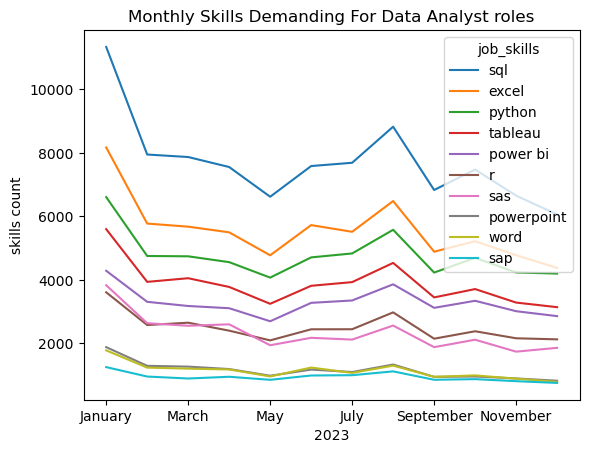

In [189]:
df_DA_skills_pivot.plot(kind="line", x="month name")
plt.title("Monthly Skills Demanding For Data Analyst roles")
plt.xlabel("2023")
plt.ylabel("skills count")
plt.show()